# Opgave 2

Brug datasættet `titanic_cleaned.csv`

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../input/titanic_cleaned.csv")

Lav en EDA
 - Numerical
   - Head
   - Describe
   - Info
   - Keys

In [3]:
%matplotlib inline
data.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [4]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.904602,0.228956
std,0.486592,0.836071,0.477990,13.002015,49.693429,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Family_cnt  891 non-null    int64  
 6   Cabin_ind   891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [6]:
data.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Family_cnt', 'Cabin_ind'], dtype='object')

Lav en EDA (fortsat)
 - Visual
   - Countplot (på survived)
   - Histogram (på age)
   - Correlation (på alle parametre)

In [7]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

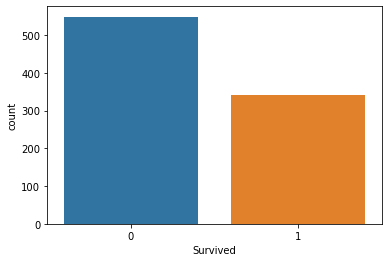

In [9]:
sns.countplot(y)

Correlation:

In [10]:
corr = data.corr()

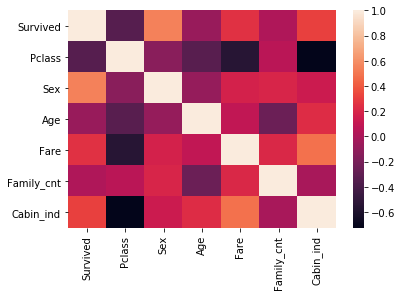

In [11]:
sns.heatmap(corr)

Histogram

In [12]:
plt.style.use('ggplot')

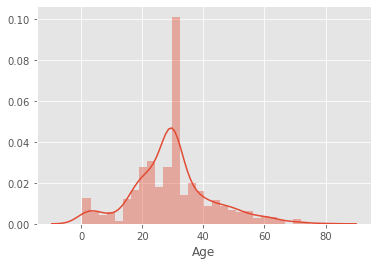

In [13]:
sns.distplot(data.Age)

In [14]:
import numpy as np
np.histogram(data.Age, bins=100)

(array([ 14,  10,   0,   6,  10,   4,   0,   3,   3,   4,   8,   0,   2,
          4,   1,   2,   0,   7,   5,  17,  13,   0,  26,  25,  15,  25,
          0,  27,  15,  31,  24,   0,  18,  18,  25,  22, 177,  27,  17,
         18,  17,   0,  16,  18,  22,   7,   0,  11,  14,  13,   8,   0,
         13,   5,   9,   0,  14,   3,   9,   9,   0,   6,  10,   7,   6,
          0,   1,   8,   2,   5,   0,   2,   5,   2,   4,   0,   3,   4,
          2,   2,   0,   3,   1,   0,   0,   0,   0,   2,   3,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   1], dtype=int64),
 array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0

Hvilke andre slags visualiseringer kan man bruge og til hvilke features?

### Hvilken type problem er det? (classification/regression, binary/multiclass)?
- Classification - hvilken label passer til data
- Binary - der er kun to labels der kan sættes på data.

### Brug følgende algoritmer:
(med fit, predict og train_test_split)
- Knn
- Decision trees

Overvej hvilke andre algoritmer man kunne have valgt.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()

In [17]:
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Mål performance på begge algoritmer:

In [18]:
print(knn.score(X_test,y_test))
print(dt.score(X_test,y_test))

0.7206703910614525
0.7653631284916201


Lav en 5-fold cross validation og sammenlign med de tidligere resultater

In [19]:
from sklearn.model_selection import cross_val_score
knn_results = cross_val_score(knn, X, y, cv=5)
dt_results = cross_val_score(dt, X, y, cv=5)
print(knn_results)
print(dt_results)

[0.6424581  0.69101124 0.7247191  0.75280899 0.71348315]
[0.73184358 0.76404494 0.85955056 0.79213483 0.8258427 ]


#### Forklar begreberne overfitting/underfitting

- Overfitting
Man har tilpasset modellen så den i høj grad vil passe på træningsdatasættet, men i mindre grad på ukendt data.

- Underfitting


### Forklar begrebet k-folds validation


